In [1]:
from collections import defaultdict
import hashlib
import math
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.image as mpimg
import numpy as np 
import pickle
import json
%matplotlib inline

In [2]:
import sys
import os
sys.path.append('..')
import cryptopunks.utils as cp
from cryptopunks import ipfs
data_dir = ('../cryptopunks/data')
assets_dir = ('../assets')
web_dir = ('../assets/web')

## ColorPunx

The CryptoPunks are a collection of 24x24, 8-bit-style pixel art images of misfits and eccentrics. There are exactly 10,000 of them, each with their own ostensible personality and unique combination of distinctive, randomly generated features. This notebook is a study of the colors used in cryptopunks.

## Load a single punk and inspect data

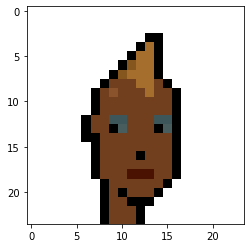

In [3]:
img = cp.get_punk(10)
plt.imshow(img)   

### Generate or Load Color Map

Convert each string representation of the pixel to a unique 8 bit integer value. Buiuld the map(string->int8) and then run through all values in a conversion pass.

In [ ]:
# this cell is expensive - do not run by default, load from pickle file
# this does the generation of the unique map across all punks.

"""
n = 10000
_colors = defaultdict(list)

for i in range(0, n):
    flatPunk = cp.flatten(cp.get_punk(i))
    colors = np.unique(flatPunk)
    for c in colors:
        _colors[c].append(i)

with open(f"{data_dir}/_colors_count.pickle", 'wb') as filehandler:
    pickle.dump(_colors, filehandler)
"""

In [4]:
_colors = None
_imgmap = None

with open(f"{data_dir}/_colors_count.pickle", 'rb') as f:
    _colors = pickle.load(f)

with open(f"{data_dir}/_img_uris.pickle", 'rb') as i:
    _imgmap = pickle.load(i)

The cryptopunks are composed of 222 unique colors; these will fit in an an 8 bit int for training.

### Explore the Color Punks Palette

Generate a color pallete of pixels starting from least frequently used.

In [5]:
sorted_colors = cp.sort_dict_by_function_of_value(_colors)
color_imgs = {i: cp.pixel_to_img(i, dim=(336, 336)) for i in list(sorted_colors)}

### generate the json files, images for each color

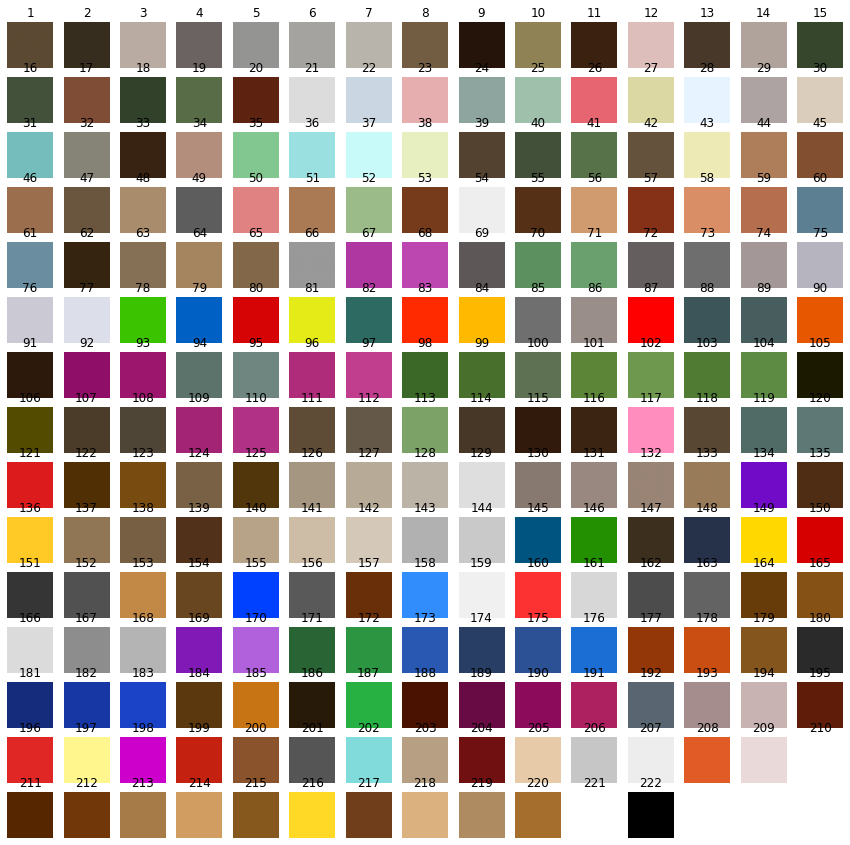

In [6]:
n = 15  
(x, y) = (n, n)
# create figure
fig = plt.figure(figsize=(x, y))

i = 1
for k in color_imgs.keys():
    fig.add_subplot(x, y, i)
    plt.imshow(color_imgs[k])
    plt.axis('off')
    plt.title(i)
    i = i+1

### write out the assets 

In [7]:
import json

### create dir for images
colors_dir = os.path.join(web_dir, 'images', 'colors')
os.makedirs(colors_dir)

_base_uri = 'https://gateway.pinata.cloud'
d = {}
i = 1

for k in color_imgs.keys():
    hexkey = cp.color_str_to_hex(k)
    d[hexkey] = {
        'original_key': k,
        'id': i,
        'name': hexkey,
        'description': f"{hexkey} is one of 222 colors in the cryptopunx color pallette. It is used by {len(_colors[k])} unique punks",
        'hash': hashlib.md5(color_imgs[k]).hexdigest(),
        'image': f"{_base_uri}{_imgmap[str(i)]}",
        'punks': _colors[k],
        'external_url': f"https://colorpunx.io/colors?i={i}&name={hexkey}"
    } 
    #with open(f"{assets_dir}/json/colorpunx{i}.json", "w") as outfile:
    #    json.dump(d[hexkey], outfile)
    #mpimg.imsave(f"{colors_dir}/colorpunx{i}.png", color_imgs[k])
    i = i + 1

### draw the punks per color and store as an image

In [8]:
### create dir for images
pbc_dir = os.path.join(web_dir, 'images', 'punks_by_color')
os.makedirs(pbc_dir)


### draw the punks per color and store as an image
n = 16  
(x, y) = (n, n)

i = 1

keys = list(d.keys())

for k in keys:
    print(k)
    fig = plt.figure(figsize=(x, y))

    for punk in d[k]['punks'][0:256]:
        fig.add_subplot(x, y, i)
        img = cp.get_punk(punk)
        plt.imshow(img)
        plt.axis('off')
        size = fig.get_size_inches() * fig.dpi
        print(size)
        plt.title(punk, y=-0.36)
        i = i+1

    img_path = f"{pbc_dir}/{d[k]['id']}.png"
    fig.savefig(img_path, bbox_inches='tight')
    plt.close(fig)
    i = 1

#5b4933ff
[1152. 1152.]
#382d1fff
[1152. 1152.]
#baaca2ff
[1152. 1152.]
#6b6361ff
[1152. 1152.]
#949593ff
[1152. 1152.]
#a4a3a0ff
[1152. 1152.]
#b8b4acff
[1152. 1152.]
#725d43ff
[1152. 1152.]
#251409ff
[1152. 1152.]
#8f8254ff
[1152. 1152.]
#3b210fff
[1152. 1152.]
#ddbebaff
[1152. 1152.]
#473929ff
[1152. 1152.]
#b0a39bff
[1152. 1152.]
#36462dff
[1152. 1152.]
[1152. 1152.]
#43513bff
[1152. 1152.]
[1152. 1152.]
#7f4d36ff
[1152. 1152.]
[1152. 1152.]
#32412aff
[1152. 1152.]
[1152. 1152.]
#596d48ff
[1152. 1152.]
[1152. 1152.]
#5d2310ff
[1152. 1152.]
[1152. 1152.]
#dcdcdcff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#cad6e1ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#e6aeaeff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#8ea59fff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#9fc0abff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#e86570ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#dcd8a4ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#e8f4ffff
[1152.

#a48560ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#826849ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#999999ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#2d6b62ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#8f0f69ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#5e7253ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#4b3c2aff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#463827ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#5d7975ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#ffc926ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#b1b1b1ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#515151ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#f0f0f0ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#b9b9b980
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#2858b1ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

#1637a4ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#690c45ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#e22626ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
#e7cba9ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#723709ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
#ae8b61ff
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 115

[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152. 1152.]
[1152.

[1152. 1152.]


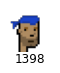

In [9]:
k = '#555555ff'
k = '#5b4933ff'

(x, y) = (16, 16)
fig = plt.figure(figsize=(x, 16))

i = 1
for punk in d[k]['punks'][0:256]: 
    fig.add_subplot(x, y, i)
    img = cp.get_punk(punk)
    plt.imshow(img)
    plt.axis('off')
    size = fig.get_size_inches() * fig.dpi
    print(size)
    plt.title(punk, y = -0.36)
    i = i+1

fig.savefig("/tmp/t.png", bbox_inches='tight')

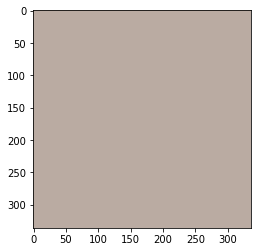

In [10]:
img = cp.pixel_to_img(d[keys[2]]['original_key'], dim=(336, 336))
plt.imshow(img)

In [11]:
def pixel_to_ximg(pixel_strs, dim=(24, 24), n=3 ):
    """
    Take pixel of format "[r,g,b,a]"
    and return an image of size `dim` containing 
    a matrix of size n*n
    """
    (x, y) = (dim[0]//n, dim[1]//n)
    m = []
    for i in range(0, n):
        imgs = []
        for j in range(0, n):
            img = np.full(
                (x, y, 4), 
                np.fromstring(pixel_strs[i*n + j][1:-1], float, sep=' ')
            )
            imgs.append(img)
        m.append(np.concatenate(imgs, axis=1))
    return np.concatenate(m, axis=0)


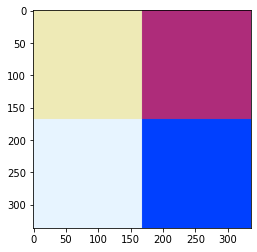

In [12]:
import random
keys = list(d.keys())
random.shuffle(keys)
colors = list(d[k]['original_key'] for k in keys)
i = pixel_to_ximg(colors, dim=(336, 336), n=2)
plt.imshow(i)

In [13]:
s = ''.join(list((cp.color_str_to_hex(c) for c in colors[0:4])))
s

'#eeeab6ff#af2c7bff#e8f4ffff#0040ffff'

In [14]:
mpimg.imsave(f"{assets_dir}/2x/images/colorpunx_4_{s}.png", i)

In [15]:
list(d.keys())[0]

'#5b4933ff'

In [16]:
import json

### create dir for json
json_dir = os.path.join(web_dir, 'json')
os.makedirs(json_dir)

### store it
out_file = open(f"{json_dir}/colors.json", "w")
json.dump(d, out_file, indent=4)
out_file.close()